# 農作物決策系統（多種模型版）

### **So, without further ado, Let's dive in and code ...**

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/Users/jiangjiaen/Desktop/DSS/COA_OpenData.csv')  # 雲嘉南
df2 = pd.read_csv('/Users/jiangjiaen/Desktop/DSS/142.csv')  # 台東

In [3]:
print("df1.columns:",df1.columns)
print("df2.columns:",df2.columns)

df1.columns: Index(['送樣日期', '樣品地段地號', '種植作物', 'EC', 'pH', '有機質', '有效性磷', '有效性鉀', '有效性鈣',
       '有效性鎂', '鈉Na'],
      dtype='object')
df2.columns: Index(['年度', '月份', '樣品編號', '試驗項目', '地點', 'pH', '有機質', 'P2O5', 'K2O', 'CaO',
       'MgO', 'EC', 'Fe', 'Mn', 'Cu', 'Zn', 'Pb', 'Cd', 'Ni', 'Cr', 'Na',
       'Si'],
      dtype='object')


In [5]:
# na_counts_df1 = df1.isna().sum()
# na_counts_df2 = df2.isna().sum()

# # 顯示結果
# print("雲嘉南土壤各欄位的 NA 值數量:")
# print(na_counts_df1)

# print("\n")

# print("台東土壤各欄位的 NA 值數量:")
# print(na_counts_df2)

雲嘉南土壤各欄位的 NA 值數量:
送樣日期         0
樣品地段地號       0
種植作物         0
EC           1
pH           1
有機質          0
有效性磷         0
有效性鉀         0
有效性鈣         2
有效性鎂         2
鈉Na       9334
dtype: int64


台東土壤各欄位的 NA 值數量:
年度        0
月份        0
樣品編號      0
試驗項目    595
地點      770
pH       96
有機質     658
P2O5    101
K2O      99
CaO      99
MgO      10
EC       14
Fe       10
Mn       10
Cu       10
Zn       10
Pb      147
Cd      147
Ni      147
Cr      140
Na      308
Si      123
dtype: int64


In [73]:
df1 = df1.drop(columns=['送樣日期', '樣品地段地號', '鈉Na'])
df2 = df2.drop(columns=['年度', '月份', '樣品編號', '地點', 'Fe', 'Mn', 'Cu', 'Zn', 'Pb', 'Cd', 'Ni', 'Cr', 'Si', 'Na'])


In [74]:
print("df1.columns:",df1.columns)
print("df2.columns:",df2.columns)

df1.columns: Index(['種植作物', 'EC', 'pH', '有機質', '有效性磷', '有效性鉀', '有效性鈣', '有效性鎂'], dtype='object')
df2.columns: Index(['試驗項目', 'pH', '有機質', 'P2O5', 'K2O', 'CaO', 'MgO', 'EC'], dtype='object')


In [75]:
# 對df1進行欄位重新命名
df1 = df1.rename(columns={
    '種植作物': 'CropType',
    '有機質': 'OrganicMatter',
    '有效性磷': 'P2O5',
    '有效性鉀': 'K2O',
    '有效性鈣': 'CaO',
    '有效性鎂': 'MgO',
})

# 對df2進行欄位重新命名
df2 = df2.rename(columns={
    '試驗項目': 'CropType',
    '有機質': 'OrganicMatter'
})

# 進行合併或其他操作
df = pd.concat([df1, df2], ignore_index=True)

In [76]:
df

,CropType,EC,pH,OrganicMatter,P2O5,K2O,CaO,MgO
0,柑桔,0.123,6.15,1.26724137931035,208.63485029868,168.420894341039,1081.41615730351,206.165826507494
1,檸檬,0.097,7.93,0.375862068965517,10.0600740957197,50.033685894896,3640.93512046294,148.802136021785
2,酪梨,0.113,7.91,1.77241379310345,172.489839904256,71.9643378444112,3566.05952455277,450.908700909717
3,酪梨,0.129,6.64,0.81551724137931,12.6821521414592,84.6154446964916,1919.61797577678,398.192781969146
4,酪梨,0.021,5.13,0.494827586206897,112.692878985239,92.7752044875284,663.180309782893,110.983884137318
...,...,...,...,...,...,...,...,...
15773,地瓜,0.21,6.37,2.57,35.28,139.82,3550.87,885.75
15774,山藥,0.06,6.74,1.85,37.93,166.13,2090.78,745.83
15775,茶,0.03,5.91,3.19,35.94,52.32,369.64,32.02
15776,茶,0.03,5.66,2.16,32.78,18.37,184.29,14.12


In [77]:
# 創建一個字典，其中鍵是要被替換的名稱，值是您希望替換為的名稱
replace_dict = {
    '紅龍果': '火龍果',
    '茶葉': '茶',
    '米': '水稻',
    '硬質玉米': '玉米',
    '小番茄': '番茄',
    '文旦': '文旦柚',
    '鳳梨釋迦': '釋迦',
    '胡蘿蔔': '紅蘿蔔'
}

# 使用replace方法進行替換
df['CropType'] = df['CropType'].replace(replace_dict)


In [78]:
df.isnull().sum()

CropType         595
EC                15
pH                97
OrganicMatter    658
P2O5             101
K2O               99
CaO              101
MgO               12
dtype: int64

In [79]:
df = df.dropna(axis=0)
df.isnull().sum()

CropType         0
EC               0
pH               0
OrganicMatter    0
P2O5             0
K2O              0
CaO              0
MgO              0
dtype: int64

In [80]:
df.dtypes

CropType         object
EC               object
pH               object
OrganicMatter    object
P2O5             object
K2O              object
CaO              object
MgO              object
dtype: object

In [81]:
cols_to_convert = df.columns[df.columns != 'CropType']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [82]:
df['CropType'].value_counts()

文旦柚                  1818
水稻                   1303
釋迦                    553
番茄                    497
火龍果                   418
                     ... 
花生.玉米.地瓜.蔥蒜.水稻.木瓜       1
小番茄.甜椒                  1
花生.玉米.地瓜.蔥蒜             1
大菜心                     1
小番茄.角瓜                  1
Name: CropType, Length: 1296, dtype: int64

In [83]:
# 創建布林遮罩，用於識別那些計數大於或等於190的種植作物
counts = df['CropType'].value_counts()
mask = df['CropType'].isin(counts[counts >= 190].index)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
15773    False
15774    False
15775    False
15776    False
15777     True
Name: CropType, Length: 14546, dtype: bool

In [84]:
df = df[mask]

In [85]:
df['CropType'].value_counts()

文旦柚    1818
水稻     1303
釋迦      553
番茄      497
火龍果     418
玉米      348
花生      327
蔬菜      296
紅蘿蔔     281
芒果      277
小米      220
Name: CropType, dtype: int64

In [86]:
df.size

50704

<AxesSubplot: >

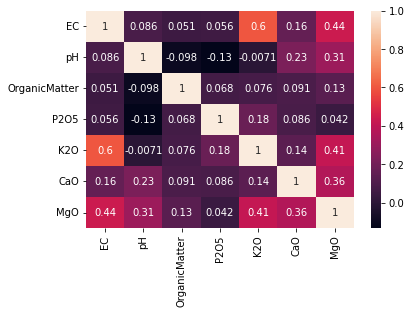

In [87]:
sns.heatmap(df.corr(),annot=True)

# Seperating features and target label

In [88]:
features = df[['EC', 'pH', 'OrganicMatter', 'P2O5', 'K2O', 'CaO', 'MgO']]
target = df['CropType']
labels = df['CropType']

In [89]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [90]:
# 以平均數填充
features_filled = features.fillna(features.mean())

In [91]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_filled, target, test_size=0.2, random_state=0)

# Methods

## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  48.186119873817034
              precision    recall  f1-score   support

          小米       0.71      0.25      0.37        48
         文旦柚       0.46      0.79      0.59       374
          水稻       0.58      0.71      0.64       251
         火龍果       0.00      0.00      0.00        95
          玉米       0.00      0.00      0.00        64
          番茄       0.43      0.21      0.28        92
         紅蘿蔔       0.41      0.54      0.46        65
          芒果       0.42      0.30      0.35        50
          花生       0.37      0.23      0.28        62
          蔬菜       0.00      0.00      0.00        63
          釋迦       0.41      0.39      0.40       104

    accuracy                           0.48      1268
   macro avg       0.34      0.31      0.31      1268
weighted avg       0.40      0.48      0.42      1268



In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
score = cross_val_score(DecisionTree, features_filled, target, cv=cv)
score 

array([0.42902208, 0.45189274, 0.43769716, 0.40883978, 0.39305446])

## Guassian Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.38485804416403785
              precision    recall  f1-score   support

          小米       0.25      0.21      0.23        48
         文旦柚       0.48      0.58      0.52       374
          水稻       0.65      0.37      0.47       251
         火龍果       0.27      0.07      0.12        95
          玉米       0.21      0.19      0.20        64
          番茄       0.44      0.23      0.30        92
         紅蘿蔔       0.32      0.69      0.44        65
          芒果       0.19      0.50      0.27        50
          花生       0.24      0.68      0.35        62
          蔬菜       0.00      0.00      0.00        63
          釋迦       0.34      0.17      0.23       104

    accuracy                           0.38      1268
   macro avg       0.31      0.33      0.28      1268
weighted avg       0.41      0.38      0.37      1268



In [95]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(NaiveBayes, features_filled, target, cv=cv)
score 

array([0.28391167, 0.28312303, 0.29810726, 0.34648777, 0.24309392])

## Support Vector Machine (SVM)

In [96]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.2996845425867508
              precision    recall  f1-score   support

          小米       0.00      0.00      0.00        48
         文旦柚       0.30      1.00      0.46       374
          水稻       0.00      0.00      0.00       251
         火龍果       1.00      0.01      0.02        95
          玉米       1.00      0.02      0.03        64
          番茄       0.75      0.03      0.06        92
         紅蘿蔔       0.00      0.00      0.00        65
          芒果       1.00      0.02      0.04        50
          花生       0.00      0.00      0.00        62
          蔬菜       0.00      0.00      0.00        63
          釋迦       0.00      0.00      0.00       104

    accuracy                           0.30      1268
   macro avg       0.37      0.10      0.06      1268
weighted avg       0.31      0.30      0.14      1268



In [97]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(SVM, features_filled, target, cv=cv)
score 

array([0.28706625, 0.28864353, 0.28864353, 0.28729282, 0.28729282])

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.3643533123028391
              precision    recall  f1-score   support

          小米       0.00      0.00      0.00        48
         文旦柚       0.37      0.78      0.50       374
          水稻       0.36      0.58      0.45       251
         火龍果       0.00      0.00      0.00        95
          玉米       0.00      0.00      0.00        64
          番茄       0.00      0.00      0.00        92
         紅蘿蔔       0.00      0.00      0.00        65
          芒果       0.00      0.00      0.00        50
          花生       0.00      0.00      0.00        62
          蔬菜       0.00      0.00      0.00        63
          釋迦       0.41      0.25      0.31       104

    accuracy                           0.36      1268
   macro avg       0.10      0.15      0.11      1268
weighted avg       0.21      0.36      0.26      1268



In [99]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(LogReg, features_filled, target, cv=cv)
score 

array([0.34700315, 0.35883281, 0.31861199, 0.36306235, 0.28887135])

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1300, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RandomForest')
print("RandomForest's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RandomForest's Accuracy is:  0.6593059936908517
              precision    recall  f1-score   support

          小米       0.89      0.69      0.78        48
         文旦柚       0.63      0.86      0.73       374
          水稻       0.74      0.81      0.77       251
         火龍果       0.71      0.16      0.26        95
          玉米       0.56      0.47      0.51        64
          番茄       0.58      0.49      0.53        92
         紅蘿蔔       0.69      0.62      0.65        65
          芒果       0.59      0.52      0.55        50
          花生       0.65      0.55      0.60        62
          蔬菜       0.80      0.19      0.31        63
          釋迦       0.63      0.71      0.67       104

    accuracy                           0.66      1268
   macro avg       0.68      0.55      0.58      1268
weighted avg       0.67      0.66      0.63      1268



In [115]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(RF, features_filled, target, cv=cv)
score 

array([0.4944795 , 0.5126183 , 0.60410095, 0.54696133, 0.47198106])

## XGboost 

In [ ]:

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 使用 LabelEncoder 轉換 Ytrain 和 Ytest
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# 使用轉換後的 Ytrain_encoded 進行訓練
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# 進行預測，這將給出整數形式的類別
predicted_values_encoded = XB.predict(Xtest)

# 使用 LabelEncoder 反向轉換預測結果獲得原始的字符串類別
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# 計算精度
accuracy = accuracy_score(Ytest_encoded, predicted_values_encoded)
acc.append(accuracy)
model.append('XGBoost')

print("XGBoost's Accuracy is:", accuracy)

# 使用原始的 Ytest 和預測的字符串類別進行分類報告
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is: 0.6277602523659306
              precision    recall  f1-score   support

          小米       0.89      0.65      0.75        48
         文旦柚       0.60      0.81      0.69       374
          水稻       0.75      0.82      0.78       251
         火龍果       0.45      0.20      0.28        95
          玉米       0.51      0.41      0.45        64
          番茄       0.57      0.51      0.54        92
         紅蘿蔔       0.63      0.49      0.55        65
          芒果       0.54      0.44      0.48        50
          花生       0.48      0.45      0.47        62
          蔬菜       0.61      0.17      0.27        63
          釋迦       0.63      0.70      0.67       104

    accuracy                           0.63      1268
   macro avg       0.61      0.51      0.54      1268
weighted avg       0.62      0.63      0.61      1268



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
# By default, n_neighbors=5. You can change this value based on your requirement.
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_model.fit(Xtrain, Ytrain)

# Predict using KNN classifier
predicted_values_knn = knn_model.predict(Xtest)

# Calculate accuracy
score = accuracy_score(Ytest, predicted_values_knn)

# Append accuracy and model name to lists
acc.append(score)
model.append('KNN')

print("KNN's Accuracy is:", score)
print(classification_report(Ytest, predicted_values_knn))


KNN's Accuracy is: 0.41798107255520506
              precision    recall  f1-score   support

          小米       0.39      0.50      0.44        48
         文旦柚       0.48      0.74      0.58       374
          水稻       0.45      0.57      0.50       251
         火龍果       0.30      0.12      0.17        95
          玉米       0.21      0.09      0.13        64
          番茄       0.25      0.16      0.20        92
         紅蘿蔔       0.21      0.14      0.17        65
          芒果       0.40      0.20      0.27        50
          花生       0.33      0.19      0.24        62
          蔬菜       0.04      0.02      0.02        63
          釋迦       0.41      0.23      0.29       104

    accuracy                           0.42      1268
   macro avg       0.32      0.27      0.27      1268
weighted avg       0.37      0.42      0.38      1268



In [ ]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(knn_model, features_filled, target, cv=cv)
score 

array([0.3170347 , 0.32413249, 0.3477918 , 0.35674822, 0.33149171])

## LightGBM Model

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the LGBM model
LGBM = LGBMClassifier(random_state=0)
LGBM.fit(Xtrain, Ytrain)

# Predict using LGBM model
predicted_values_LGBM = LGBM.predict(Xtest)

# Calculate accuracy
accuracy_LGBM = accuracy_score(Ytest, predicted_values_LGBM)

# Append accuracy and model name to lists
acc.append(accuracy_LGBM)
model.append('LGBM')

print("LGBM's Accuracy is:", accuracy_LGBM)
print(classification_report(Ytest, predicted_values_LGBM))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 7
[LightGBM] [Info] Start training from score -3.383602
[LightGBM] [Info] Start training from score -1.255924
[LightGBM] [Info] Start training from score -1.572648
[LightGBM] [Info] Start training from score -2.753444
[LightGBM] [Info] Start training from score -2.882122
[LightGBM] [Info] Start training from score -2.527209
[LightGBM] [Info] Start training from score -3.155818
[LightGBM] [Info] Start training from score -3.106146
[LightGBM] [Info] Start training from score -2.951366
[LightGBM] [Info] Start training from score -3.080058
[LightGBM] [Info] Start training from score -2.424073
LGBM's Accuracy is: 0.6269716088328076
              precision    recall  f1-score   support

          小米       0.94  

In [ ]:
cv = StratifiedKFold(n_splits=5)
score = cross_val_score(LGBM, features_filled, target, cv=cv)
score 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 7
[LightGBM] [Info] Start training from score -3.360612
[LightGBM] [Info] Start training from score -1.249022
[LightGBM] [Info] Start training from score -1.582199
[LightGBM] [Info] Start training from score -2.719955
[LightGBM] [Info] Start training from score -2.899884
[LightGBM] [Info] Start training from score -2.544644
[LightGBM] [Info] Start training from score -3.114996
[LightGBM] [Info] Start training from score -3.132933
[LightGBM] [Info] Start training from score -2.962752
[LightGBM] [Info] Start training from score -3.063036
[LightGBM] [Info] Start training from score -2.439786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `fo

array([0.47476341, 0.51025237, 0.57886435, 0.53117601, 0.45146014])

# Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

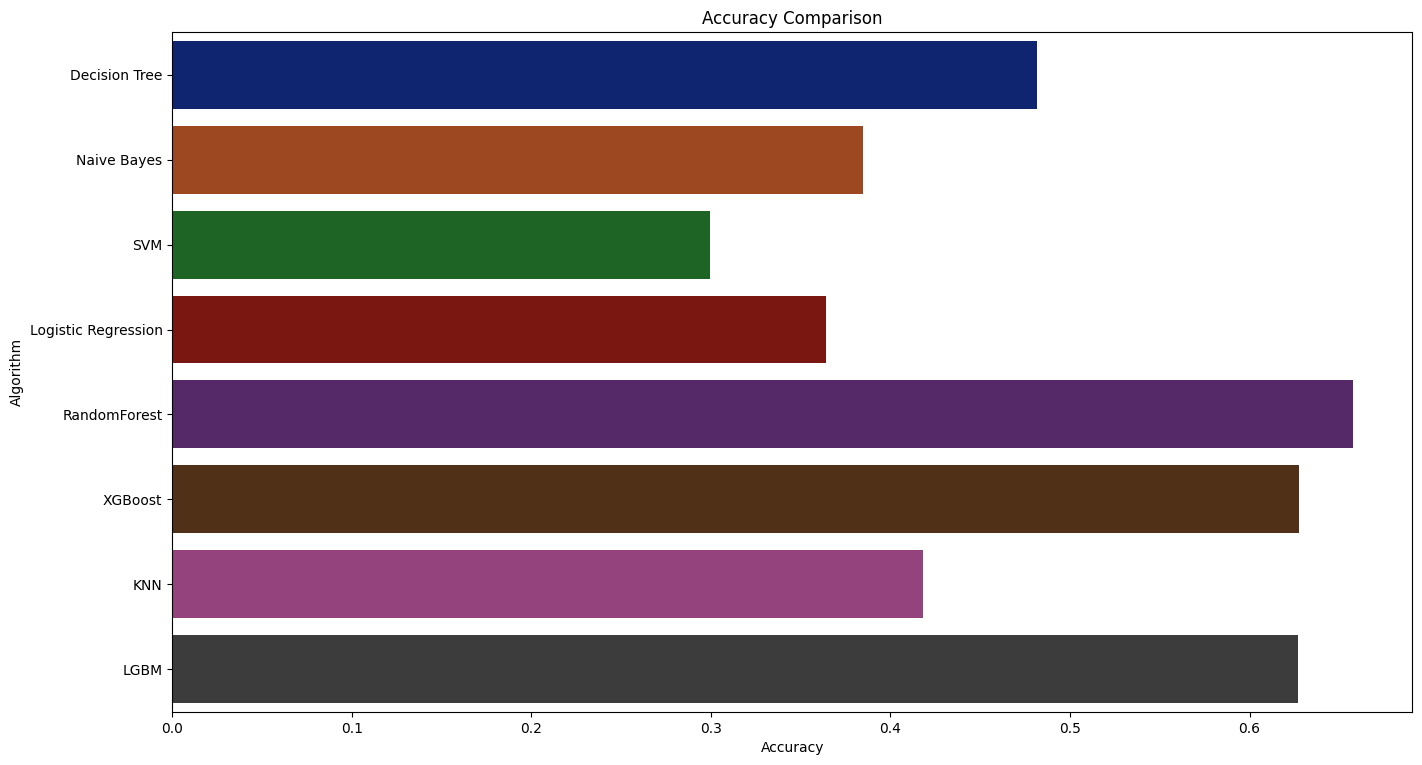

In [ ]:
plt.figure(figsize=[16,9],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.48186119873817035
Naive Bayes --> 0.38485804416403785
SVM --> 0.2996845425867508
Logistic Regression --> 0.3643533123028391
RandomForest --> 0.6577287066246057
XGBoost --> 0.6277602523659306
KNN --> 0.41798107255520506
LGBM --> 0.6269716088328076


## Making a prediction

In [ ]:
data = np.array([[0.3, 5.17, 1.3, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)

In [ ]:
print(prediction)

['文旦柚']
